In [1]:
# Goal: We now have a few points of UV photometry.. how does the SED evolve?

In [33]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const

In [48]:
# load UVOT photometry
uvot=table.Table.read('../data/uvot_phot.txt', format='ascii')
uvot['mjd'] = uvot['JD'] - 2400000.5

# load SEDM photometry
marshal=table.Table.read('../data/marshal_raw_lc.csv', format='ascii')
marshal['mjd'] = marshal['jdobs'] - 2400000.5
marshal

# load ztflc
ztf = table.Table.read('../data/ztflc_forcefit.h5')
ztf['mag'] = -2.5*np.log10(ztf['ampl']) + ztf['magzp']
ztf['phase'] = ztf['obsmjd'] - const.sne_peak_mjd['g']
ztf['mag_err'] = ztf['ampl.err']/ztf['ampl']*1.087 + ztf['magzprms']
ztf.sort('phase')

# load comparison objects
sn2008d = dataloader.load_comparison_json_phot('SN2008D.json', phase0=54490)
ptf13bvn = dataloader.load_comparison_json_phot('iPTF13bvn.json', phase0=(2456477.5 - 2400000.5))


<ipython-input-48-aaa8a5c42636>:12: RuntimeWarning: invalid value encountered in log10
  ztf['mag'] = -2.5*np.log10(ztf['ampl']) + ztf['magzp']


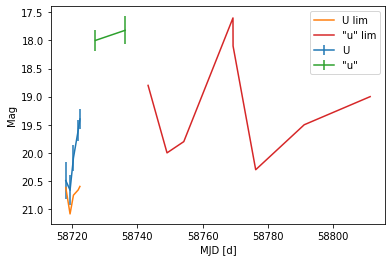

In [41]:
band = 'U'
idx = uvot['FILTER'] == band
plt.errorbar(uvot['mjd'][idx], uvot['AB_MAG'][idx], yerr=uvot['AB_MAG_ERR'][idx], label='%s' % band)
plt.plot(uvot['mjd'][idx], uvot['AB_MAG_LIM'][idx], label='%s lim' % band)

band_sedm = '"%s"' % band.lower()
idx = marshal['filter'] == band_sedm
idx = np.logical_and(idx, marshal['magpsf'] < 40)
plt.errorbar(marshal['mjd'][idx], marshal['magpsf'][idx], yerr=marshal['sigmamagpsf'][idx], label='%s' % band_sedm)
idx = marshal['filter'] == band_sedm
idx = np.logical_and(idx, marshal['magpsf'] > 40)
idx = np.logical_and(idx, marshal['limmag'] < 40)
plt.plot(marshal['mjd'][idx], marshal['limmag'][idx], label='%s lim' % band_sedm)

plt.xlabel('MJD [d]')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
plt.legend()

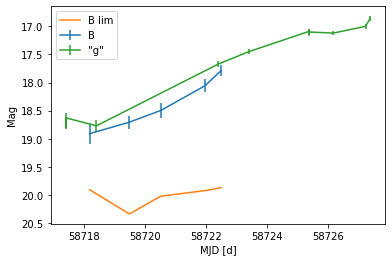

In [26]:
band = 'B'
idx = uvot['FILTER'] == band
plt.errorbar(uvot['mjd'][idx], uvot['AB_MAG'][idx], yerr=uvot['AB_MAG_ERR'][idx], label='%s' % band)
plt.plot(uvot['mjd'][idx], uvot['AB_MAG_LIM'][idx], label='%s lim' % band)

band_sedm = '"g"'
idx = marshal['filter'] == band_sedm
idx = np.logical_and(idx, marshal['magpsf'] < 40)
idx = np.logical_and(idx, marshal['mjd'] < 58730)
plt.errorbar(marshal['mjd'][idx], marshal['magpsf'][idx], yerr=marshal['sigmamagpsf'][idx], label='%s' % band_sedm)

plt.xlabel('MJD [d]')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
plt.legend()

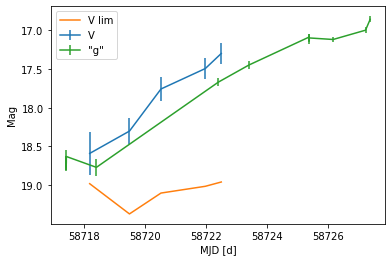

In [27]:
band = 'V'
idx = uvot['FILTER'] == band
plt.errorbar(uvot['mjd'][idx], uvot['AB_MAG'][idx], yerr=uvot['AB_MAG_ERR'][idx], label='%s' % band)
plt.plot(uvot['mjd'][idx], uvot['AB_MAG_LIM'][idx], label='%s lim' % band)

band_sedm = '"g"'
idx = marshal['filter'] == band_sedm
idx = np.logical_and(idx, marshal['magpsf'] < 40)
idx = np.logical_and(idx, marshal['mjd'] < 58730)
plt.errorbar(marshal['mjd'][idx], marshal['magpsf'][idx], yerr=marshal['sigmamagpsf'][idx], label='%s' % band_sedm)

plt.xlabel('MJD [d]')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
plt.legend()

In [29]:
# combine the U band photometry
band = 'U'
idx = uvot['FILTER'] == band
#plt.errorbar(uvot['mjd'][idx], uvot['AB_MAG'][idx], yerr=uvot['AB_MAG_ERR'][idx], label='%s' % band)

band_sedm = '"%s"' % band.lower()
idx2 = marshal['filter'] == band_sedm
idx2 = np.logical_and(idx2, marshal['magpsf'] < 40)
#plt.errorbar(marshal['mjd'][idx], marshal['magpsf'][idx], yerr=marshal['sigmamagpsf'][idx], label='%s' % band_sedm)


u_mjd = np.concatenate((uvot['mjd'][idx], marshal['mjd'][idx2]))
u_mag = np.concatenate((uvot['AB_MAG'][idx], marshal['magpsf'][idx2]))


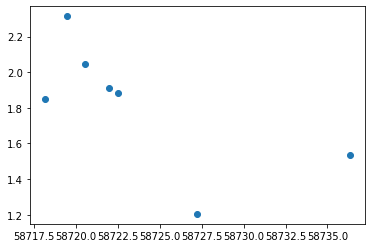

In [44]:
band = 'r'
idx = ztf['filter'] == ('ZTF_%s' % band)
r_mag = np.interp(u_mjd, ztf['obsmjd'][idx], ztf['mag'][idx])
plt.plot(u_mjd, u_mag - r_mag, marker='o', ls='')

In [45]:
# upper limit color..

# combine the U band photometry
band = 'U'
idx = uvot['FILTER'] == band
#plt.errorbar(uvot['mjd'][idx], uvot['AB_MAG'][idx], yerr=uvot['AB_MAG_ERR'][idx], label='%s' % band)

band_sedm = '"%s"' % band.lower()
idx2 = marshal['filter'] == band_sedm
idx2 = np.logical_and(idx2, marshal['limmag'] < 40)
#plt.errorbar(marshal['mjd'][idx], marshal['magpsf'][idx], yerr=marshal['sigmamagpsf'][idx], label='%s' % band_sedm)


u_lim_mjd = np.concatenate((uvot['mjd'][idx], marshal['mjd'][idx2]))
u_lim_mag = np.concatenate((uvot['AB_MAG_LIM'][idx], marshal['limmag'][idx2]))


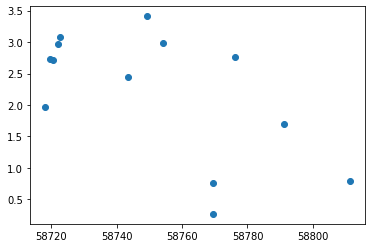

In [47]:
band = 'r'
idx = ztf['filter'] == ('ZTF_%s' % band)
r_mag = np.interp(u_lim_mjd, ztf['obsmjd'][idx], ztf['mag'][idx])
plt.plot(u_lim_mjd, u_lim_mag - r_mag, marker='o', ls='')

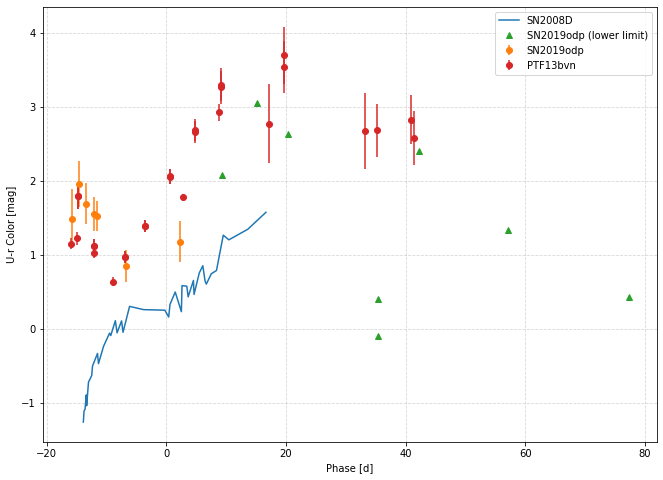

In [76]:
# U - r lightcurves
plt.figure(figsize=(11,8))

# SN2008D
u_mjd = np.array(sn2008d.query('band == "U"')['mjd'])
u_mag = np.array(sn2008d.query('band == "U"')['mag'])
r_mjd = np.array(sn2008d.query('band == "r\'"')['mjd'])
r_mag = np.array(sn2008d.query('band == "r\'"')['mag'])

r_mag_interp = np.interp(u_mjd, r_mjd, r_mag)
plt.plot(u_mjd - 54490, u_mag-4.1*0.8-(r_mag_interp-2.285*0.8), label='SN2008D')
#plt.plot(u_mjd - 54490, u_mag-(r_mag_interp), label='SN2008D obs')

# SN2019odp
# combine the U band photometry
band = 'U'
idx = uvot['FILTER'] == band
#plt.errorbar(uvot['mjd'][idx], uvot['AB_MAG'][idx], yerr=uvot['AB_MAG_ERR'][idx], label='%s' % band)

band_sedm = '"%s"' % band.lower()
idx2 = marshal['filter'] == band_sedm
idx2 = np.logical_and(idx2, marshal['magpsf'] < 40)
#plt.errorbar(marshal['mjd'][idx], marshal['magpsf'][idx], yerr=marshal['sigmamagpsf'][idx], label='%s' % band_sedm)


u_mjd = np.concatenate((uvot['mjd'][idx], marshal['mjd'][idx2]))
u_mag = np.concatenate((uvot['AB_MAG'][idx], marshal['magpsf'][idx2]))
u_err = np.concatenate((uvot['AB_MAG_ERR'][idx], marshal['sigmamagpsf'][idx2]))


# upper limit SN2019odp photometry
band = 'U'
idx = uvot['FILTER'] == band
idx = np.logical_and(idx, uvot['AB_MAG_LIM'] < uvot['AB_MAG'])
#plt.errorbar(uvot['mjd'][idx], uvot['AB_MAG'][idx], yerr=uvot['AB_MAG_ERR'][idx], label='%s' % band)

band_sedm = '"%s"' % band.lower()
idx2 = marshal['filter'] == band_sedm
idx2 = np.logical_and(idx2, marshal['magpsf'] > 40)
idx2 = np.logical_and(idx2, marshal['limmag'] < 40)
#plt.errorbar(marshal['mjd'][idx], marshal['magpsf'][idx], yerr=marshal['sigmamagpsf'][idx], label='%s' % band_sedm)


u_lim_mjd = np.concatenate((uvot['mjd'][idx], marshal['mjd'][idx2]))
u_lim_mag = np.concatenate((uvot['AB_MAG_LIM'][idx], marshal['limmag'][idx2]))

band = 'r'
idx = ztf['filter'] == ('ZTF_%s' % band)
r_mag = np.interp(u_mjd, ztf['obsmjd'][idx], ztf['mag'][idx])
r_err = np.interp(u_mjd, ztf['obsmjd'][idx], ztf['mag_err'][idx])
ebv19odp = 0.2
plt.errorbar(u_mjd - const.sne_peak_mjd['g'], (u_mag - ebv19odp*4.1)  - (r_mag-2.285*ebv19odp), yerr=u_err+r_err, marker='o', ls='', label='SN2019odp')

band = 'r'
idx = ztf['filter'] == ('ZTF_%s' % band)
r_mag = np.interp(u_lim_mjd, ztf['obsmjd'][idx], ztf['mag'][idx])
plt.plot(u_lim_mjd - const.sne_peak_mjd['g'], (u_lim_mag - ebv19odp*4.1) - (r_mag-2.285*ebv19odp), marker='^', ls='', label='SN2019odp (lower limit)')


# PTF13bvn
u_mjd = np.array(ptf13bvn.query('band == "U"')['phase'])
u_mag = np.array(ptf13bvn.query('band == "U"')['mag'])
u_err = np.array(ptf13bvn.query('band == "U"')['mag_err'])
r_mjd = np.array(ptf13bvn.query('band == "r"')['phase'])
r_mag = np.array(ptf13bvn.query('band == "r"')['mag'])
r_err = np.array(ptf13bvn.query('band == "r"')['mag_err'])


r_mag_interp = np.interp(u_mjd, r_mjd, r_mag)
r_err_interp = np.interp(u_mjd, r_mjd, r_err)
plt.errorbar(u_mjd, u_mag-4.1*0.12+0.79-(r_mag_interp-2.285*0.12), yerr=(u_err+r_err_interp), marker='o', ls='', label='PTF13bvn')

plt.legend()
plt.grid(alpha=0.5, ls='--')
plt.xlabel('Phase [d]')
plt.ylabel('U-r Color [mag]')
plt.savefig('../paper/plots/tmp_lc_uv_evolution.png')

In [75]:
ptf13bvn

mjd band instrument     mag  mag_err    phase
0    56459.238    r       None  18.611    0.050  -17.762
1    56459.291    r       None  18.619    0.050  -17.709
2    56460.240    r       None  17.612    0.040  -16.760
3    56460.288    r       None  17.552    0.040  -16.712
4    56460.377    i       None  17.668    0.010  -16.623
..         ...  ...        ...     ...      ...      ...
673  56752.455    r       None  21.419    0.210  275.455
674  56752.463    g       None  22.231    0.311  275.463
675  56779.008    g       None  22.941    0.289  302.008
676  56779.023    r       None  21.712    0.177  302.023
677  56812.948    r       None  21.995    0.281  335.948

[678 rows x 6 columns]